In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn import preprocessing


In [2]:
# Data Import - Kaggle
df=pd.read_csv("D:/Venkatesh/Code/Dataset/Accident/US_Accidents_June20.csv")

<h3>Data Wrangling</h3>
Data Analysis performed by using functions like head, columns, describe, corr etc.
Cleaned the dataset by removing the null values and have chosen the required features to predict the Severity

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [6]:
df.corr()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
TMC,1.000000,0.181005,-0.005596,-0.016746,NaN,NaN,0.044112,0.038501,0.003032,0.035314,...,0.015018,0.025261,-0.002877,-0.010282,-0.002030,-0.019206,-0.021519,-0.002845,-0.061807,NaN
Severity,0.181005,1.000000,0.047617,0.083705,0.036787,0.263622,0.150326,0.019658,-0.027275,-0.082260,...,-0.007747,0.060086,-0.006705,-0.023492,-0.003956,-0.048260,-0.053500,-0.006073,-0.191531,NaN
Start_Lat,-0.005596,0.047617,1.000000,-0.013994,0.999994,-0.025072,0.062742,0.061702,-0.426281,-0.490026,...,-0.001637,0.033115,0.000233,-0.000314,-0.000280,0.016133,0.011216,0.009136,-0.091752,NaN
Start_Lng,-0.016746,0.083705,-0.013994,1.000000,-0.025047,0.999999,0.048143,-0.192664,-0.062612,-0.166056,...,0.017186,-0.061057,-0.002869,-0.023936,0.000794,-0.011009,-0.040357,-0.006283,0.087513,NaN
End_Lat,NaN,0.036787,0.999994,-0.025047,1.000000,-0.025043,0.027150,0.146273,-0.444128,-0.485574,...,0.002199,-0.053624,-0.013573,0.001298,0.000591,0.008725,0.016614,0.002890,-0.063574,NaN
End_Lng,NaN,0.263622,-0.025072,0.999999,-0.025043,1.000000,0.110152,-0.187397,-0.038175,-0.179154,...,0.021605,0.021353,0.007142,-0.021576,0.001147,0.003372,-0.034919,-0.000857,0.110323,NaN
Distance(mi),0.044112,0.150326,0.062742,0.048143,0.027150,0.110152,1.000000,0.046471,-0.038262,-0.043421,...,-0.002687,0.031374,-0.003175,-0.011938,-0.001164,-0.022232,-0.011501,-0.001232,-0.069620,NaN
Number,0.038501,0.019658,0.061702,-0.192664,0.146273,-0.187397,0.046471,1.000000,-0.027639,-0.013818,...,-0.001016,-0.004376,-0.005254,-0.011656,-0.001053,-0.028158,0.002657,-0.002489,-0.053192,NaN
Temperature(F),0.003032,-0.027275,-0.426281,-0.062612,-0.444128,-0.038175,-0.038262,-0.027639,1.000000,0.994274,...,0.000151,-0.006240,0.003883,0.005700,-0.001042,0.003489,0.000846,-0.001218,0.062006,NaN
Wind_Chill(F),0.035314,-0.082260,-0.490026,-0.166056,-0.485574,-0.179154,-0.043421,-0.013818,0.994274,1.000000,...,0.000327,-0.007065,0.004412,0.014135,-0.001235,0.001519,0.006937,0.001579,0.065004,NaN


In [7]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [8]:
df.count()

ID                       3513617
Source                   3513617
TMC                      2478818
Severity                 3513617
Start_Time               3513617
End_Time                 3513617
Start_Lat                3513617
Start_Lng                3513617
End_Lat                  1034799
End_Lng                  1034799
Distance(mi)             3513617
Description              3513616
Number                   1250753
Street                   3513617
Side                     3513617
City                     3513505
County                   3513617
State                    3513617
Zipcode                  3512548
Country                  3513617
Timezone                 3509737
Airport_Code             3506859
Weather_Timestamp        3470294
Temperature(F)           3447885
Wind_Chill(F)            1645368
Humidity(%)              3443930
Pressure(in)             3457735
Visibility(mi)           3437761
Wind_Direction           3454743
Wind_Speed(mph)          3059008
Precipitat

In [9]:
print(df.isnull().sum())

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [10]:
#Chosing specific columns

dfFinal = df.filter(['Severity','City ','County','State','Zipcode', 
              'Humidity(%)', 'Temperature(F)', 'Pressure(in)', 
              'Visibility(mi)', 'Weather_Condition','Traffic_Signal','Junction','Stop'],axis=1)

In [11]:
dfFinal.head()

,Severity,County,State,Zipcode,Humidity(%),Temperature(F),Pressure(in),Visibility(mi),Weather_Condition,Traffic_Signal,Junction,Stop
0,3,Montgomery,OH,45424,91.0,36.9,29.68,10.0,Light Rain,False,False,False
1,2,Franklin,OH,43068-3402,100.0,37.9,29.65,10.0,Light Rain,False,False,False
2,2,Clermont,OH,45176,100.0,36.0,29.67,10.0,Overcast,True,False,False
3,3,Montgomery,OH,45417,96.0,35.1,29.64,9.0,Mostly Cloudy,False,False,False
4,2,Montgomery,OH,45459,89.0,36.0,29.65,6.0,Mostly Cloudy,True,False,False


In [12]:
#Check sum of null values across the chosen columns
dfFinal.isnull().sum()

Severity                 0
County                   0
State                    0
Zipcode               1069
Humidity(%)          69687
Temperature(F)       65732
Pressure(in)         55882
Visibility(mi)       75856
Weather_Condition    76138
Traffic_Signal           0
Junction                 0
Stop                     0
dtype: int64

In [13]:
dfFinal.dropna(inplace=True)

In [14]:
dfFinal.isnull().sum()

Severity             0
County               0
State                0
Zipcode              0
Humidity(%)          0
Temperature(F)       0
Pressure(in)         0
Visibility(mi)       0
Weather_Condition    0
Traffic_Signal       0
Junction             0
Stop                 0
dtype: int64

In [15]:
dfFinal.count()

Severity             3411096
County               3411096
State                3411096
Zipcode              3411096
Humidity(%)          3411096
Temperature(F)       3411096
Pressure(in)         3411096
Visibility(mi)       3411096
Weather_Condition    3411096
Traffic_Signal       3411096
Junction             3411096
Stop                 3411096
dtype: int64

In [16]:
dfFinal

,Severity,County,State,Zipcode,Humidity(%),Temperature(F),Pressure(in),Visibility(mi),Weather_Condition,Traffic_Signal,Junction,Stop
0,3,Montgomery,OH,45424,91.0,36.9,29.68,10.0,Light Rain,False,False,False
1,2,Franklin,OH,43068-3402,100.0,37.9,29.65,10.0,Light Rain,False,False,False
2,2,Clermont,OH,45176,100.0,36.0,29.67,10.0,Overcast,True,False,False
3,3,Montgomery,OH,45417,96.0,35.1,29.64,9.0,Mostly Cloudy,False,False,False
4,2,Montgomery,OH,45459,89.0,36.0,29.65,6.0,Mostly Cloudy,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2,Riverside,CA,92501,40.0,86.0,28.92,10.0,Fair,False,False,False
3513613,2,San Diego,CA,92108,73.0,70.0,29.39,10.0,Fair,False,False,False
3513614,2,Orange,CA,92866,64.0,73.0,29.74,10.0,Partly Cloudy,False,True,False
3513615,2,Los Angeles,CA,90230,81.0,71.0,29.62,10.0,Fair,False,False,False


In [17]:
dfFinal['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'TN', 'NC', 'KS', 'LA',
       'OK', 'CO', 'UT', 'AZ', 'MN', 'MS', 'NV', 'ME', 'AR', 'ID', 'VT',
       'NM', 'ND', 'WY', 'SD', 'MT'], dtype=object)

In [18]:
dfFinal['Severity'].unique()

array([3, 2, 1, 4], dtype=int64)

Converting Categorical valriables to quantitative Variables

In [19]:
# Converting Categorical valriables to quantitative Variables

dfFinal['Stop']=dfFinal['Stop'].astype("int")
dfFinal['Traffic_Signal']=dfFinal['Traffic_Signal'].astype("int")
dfFinal['Junction']=dfFinal['Junction'].astype("int")

In [20]:
dfFinal

,Severity,County,State,Zipcode,Humidity(%),Temperature(F),Pressure(in),Visibility(mi),Weather_Condition,Traffic_Signal,Junction,Stop
0,3,Montgomery,OH,45424,91.0,36.9,29.68,10.0,Light Rain,0,0,0
1,2,Franklin,OH,43068-3402,100.0,37.9,29.65,10.0,Light Rain,0,0,0
2,2,Clermont,OH,45176,100.0,36.0,29.67,10.0,Overcast,1,0,0
3,3,Montgomery,OH,45417,96.0,35.1,29.64,9.0,Mostly Cloudy,0,0,0
4,2,Montgomery,OH,45459,89.0,36.0,29.65,6.0,Mostly Cloudy,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2,Riverside,CA,92501,40.0,86.0,28.92,10.0,Fair,0,0,0
3513613,2,San Diego,CA,92108,73.0,70.0,29.39,10.0,Fair,0,0,0
3513614,2,Orange,CA,92866,64.0,73.0,29.74,10.0,Partly Cloudy,0,1,0
3513615,2,Los Angeles,CA,90230,81.0,71.0,29.62,10.0,Fair,0,0,0


Using 1.5 % of the total dataset for Modelling 

In [21]:
#Using 1.5 % of the total dataset for Modelling
dfSampledFinal = dfFinal.sample(frac=.015)

<h3>Data visualization</h3>
HeatMap to understand the correlation value

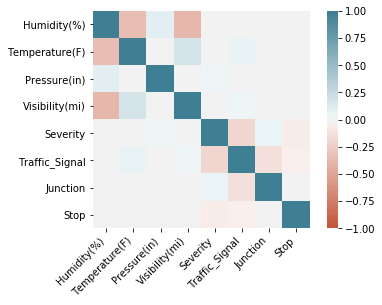

In [22]:

columns = ['Humidity(%)', 'Temperature(F)', 'Pressure(in)', 'Visibility(mi)', 'Severity','Traffic_Signal','Junction','Stop']
corr=dfSampledFinal[columns].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

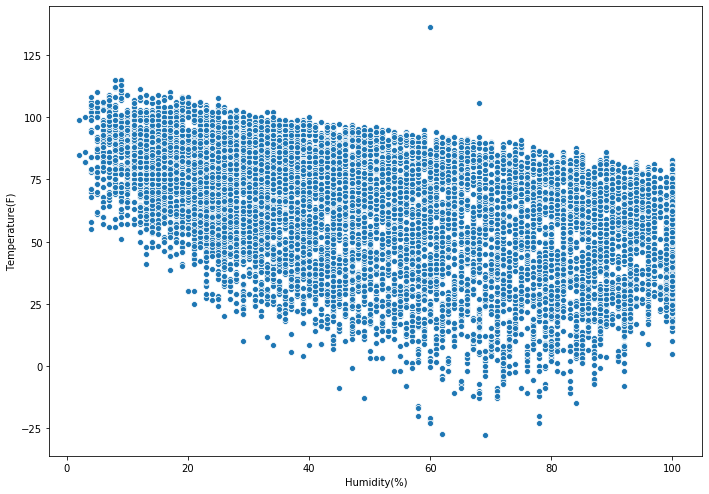

In [23]:
#Figuring out the data points between 'Humidity(%)' and 'Temperature(F)'

fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(dfSampledFinal['Humidity(%)'],dfSampledFinal['Temperature(F)'],data =dfSampledFinal, ax=ax)


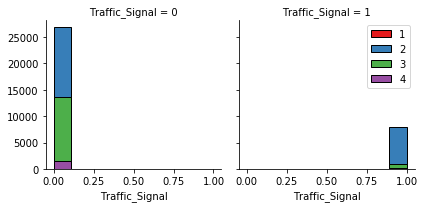

In [24]:
# Binning - Severity based on Traffic Signal  
bins = np.linspace(dfSampledFinal['Traffic_Signal'].min(), dfSampledFinal['Traffic_Signal'].max(), 10)
g = sns.FacetGrid(dfSampledFinal, col="Traffic_Signal", hue="Severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Traffic_Signal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

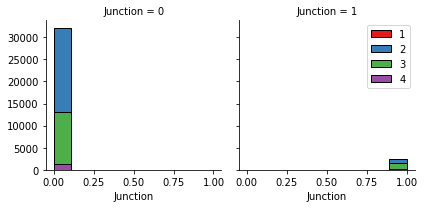

In [25]:
# Binning - Severity based on Junction  

bins = np.linspace(dfSampledFinal['Junction'].min(), dfSampledFinal['Junction'].max(), 10)
g = sns.FacetGrid(dfSampledFinal, col="Junction", hue="Severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Junction', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

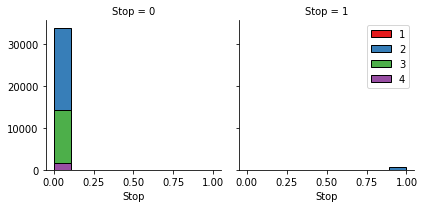

In [26]:
# Binning - Stop  

bins = np.linspace(dfSampledFinal['Stop'].min(), dfSampledFinal['Stop'].max(), 10)
g = sns.FacetGrid(dfSampledFinal, col="Stop", hue="Severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Stop', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [27]:
dfSampledFinal['Weather_Condition'].value_counts()

Clear                                  12012
Fair                                    8129
Mostly Cloudy                           7296
Overcast                                5659
Partly Cloudy                           5160
                                       ...  
Volcanic Ash                               1
Heavy Thunderstorms with Small Hail        1
Drizzle and Fog                            1
Thunder / Windy                            1
Light Snow Showers                         1
Name: Weather_Condition, Length: 68, dtype: int64

<h3>Feature Selection / PreProcessing</h3>

In [28]:
#Chosinf Features
Feature = dfSampledFinal[['Humidity(%)', 'Temperature(F)', 'Pressure(in)', 'Visibility(mi)','Traffic_Signal','Junction','Stop']]
#Get Dummies for Weather COndition and amending in the Features
pd.concat([Feature,pd.get_dummies(df['Weather_Condition'])], axis=1)
X = Feature

#Target
y = dfSampledFinal['Severity']

X= preprocessing.StandardScaler().fit(X).transform(X)


<h3>K Nearest Neighbor(KNN)</h3>
The below code is performed to determine the best k to build the model with the best accuracy.

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
D:\Installed\Anaconda\lib\site-packages\sklear

[0.56497948 0.63249951 0.59996091 0.63611491 0.6215556  0.64080516
 0.63318351 0.6461794  0.64442056]


D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


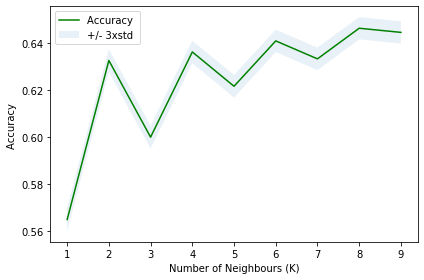

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Ks = 10
mean_acc = np.zeros((Ks-1))
#print(mean_acc)
std_acc = np.zeros((Ks-1))
#print(std_acc)

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = jaccard_similarity_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    #print(yhat)
    #print(y_test)
    #print(yhat.shape[0])

print(mean_acc)
#print(mean_acc +  1)
#print(std_acc)


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 *std_acc ,mean_acc + 1 *std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

<h3>Prediction with K= 8 based on the above outcome</h3>

In [30]:
finalKnn = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
yhatFinal= finalKnn.predict(X_test)
finalKnnJacardAcc = round(jaccard_similarity_score(y_test,yhatFinal),2)
print("Accuracy of the outcome with K=8:",  finalKnnJacardAcc)

Accuracy of the outcome with K=8: 0.65


D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
